### Week 14 - Multiple Linear Regression and Logistic Regression

Multiple linear regression predicts dependent variable from multiple independent variables :multivariate: means the result is a vector.

How do we choose columns
- look at correlations 
- cross validation, check out r-squared before and after variables are added, look at correlations
- use mean squared error and r-squared to validate model performance 

Mean Squared error - want to be as small as possible

R-squared -  the square of the correlation

The data (X1, X2, X3, X4, X5, X6, X7) are for each city.

    X1 = total overall reported crime rate per 1 million residents
    X2 = reported violent crime rate per 100,000 residents
    X3 = annual police funding in USD/resident
    X4 = % of people 25 years+ with 4 yrs. of high school
    X5 = % of 16 to 19 year-olds not in highschool and not highschool graduates.
    X6 = % of 18 to 24 year-olds in college
    X7 = % of people 25 years+ with at least 4 years of college

Reference: Life In America's Small Cities, By G.S. Thomas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
crime_df = pd.read_csv('..\Datasets\crime_data.csv')
crime_df.head()

,X1,X2,X3,X4,X5,X6,X7
0,478,184,40,74,11,31,20
1,494,213,32,72,11,43,18
2,643,347,57,70,18,16,16
3,341,565,31,71,11,25,19
4,773,327,67,72,9,29,24


<AxesSubplot:>

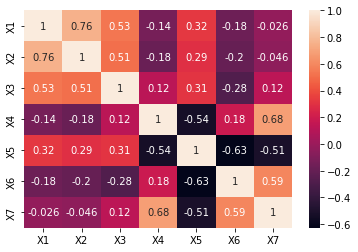

In [3]:
#look at correlation to see which variables we want to use for multiple linear regression
#need to use variables that are uncorrelated with each other in our equation

correlation = crime_df.corr()
sns.heatmap(correlation, annot=True)

#X2 is the most highly correlated with X1 (predicted)
#also try X5

In [5]:
X = crime_df[['X2','X5']]
y = crime_df['X1']

#x1 = m2x2 + m5x5
#predict x1 based on the coefficient of values of x2 ...

In [6]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X,y)

LinearRegression()

In [7]:
#get y predicted values of X1 based on X2 and X5
#R-squared value
y_pred = regression.predict(X)
accuracy_score = regression.score(X,y)
accuracy_score

0.5837453357756106

In [ ]:
#better performance with multiple variables that are thoughtfully chosen

#cross validation by iterating with other columns and checking r-squared values

In [8]:
#regression coefficients 
regression.coef_

array([0.37090062, 5.45658858])

In [ ]:
#equation for the model
#   X1 = 0.37X2 + 5.46X5

### Ordinary Least Squares

OLS Regression
- minimizing loss
- type of linear regression that lets you estimate the dependent variable and understand the interaction between variables
- helpful for highly correlated variables
- allows us to look at interactions and features without interactions and incorporate both into model

In [10]:
from statsmodels.formula.api import ols

In [11]:
diabetes_df = pd.read_csv('..\Datasets\diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
#understand the distribution
diabetes_df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [17]:
#OLS syntax is different, use ~ instead of =
diabetes_vs_glucose = ols('Outcome~Glucose', data=diabetes_df).fit()

#view parameters, get intercept and coefficient
print(diabetes_vs_glucose.params)

#y = mx + b
#outcome = .007(glucose) + (-0.49)

#create variables for those parameters
intercept, slope = diabetes_vs_glucose.params

Intercept   -0.492495
Glucose      0.006960
dtype: float64


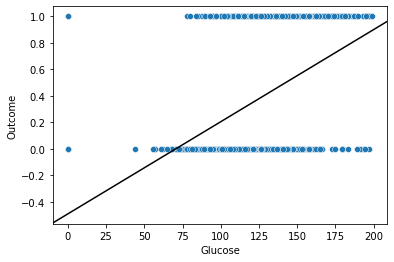

In [20]:
sns.scatterplot(x='Glucose', y='Outcome', data=diabetes_df)
plt.axline(xy1=(0, intercept), slope=slope, color='black')

In [ ]:
# looks strange becasue we are using this to predict a binary outcome 
# multiple linear regression (OLS) is not the right tool for modeling this dataset

# in this scenario, use logistic regression

### Logistic Regression

In [21]:
from statsmodels.formula.api import logit

In [23]:
#no interaction, like in Dabetes above
#addative
age_gl_no_int = logit('Outcome ~ Age + Glucose', data = diabetes_df).fit()
print(age_gl_no_int.params)

Optimization terminated successfully.
         Current function value: 0.519116
         Iterations 6
Intercept   -5.912449
Age          0.024778
Glucose      0.035644
dtype: float64


In [24]:
#gives us the values for an equation
# outcome = -5.9 + 0.02(age) + 0.04(glucose)

In [25]:
#with interaction
#multiplicative
age_gl_int = logit('Outcome ~ Age * Glucose', data = diabetes_df).fit()
print(age_gl_int.params)

Optimization terminated successfully.
         Current function value: 0.513197
         Iterations 6
Intercept     -9.510659
Age            0.126536
Glucose        0.063854
Age:Glucose   -0.000789
dtype: float64


In [ ]:
# outcome = -8.5 + 0.12(age) + 0.064(glucose) + -0.0008(age)(glucose)

### Ways to Evaluate Models

- accuracy = true positive + true negatives / tp + tn + fp + fn
- precision = tp / tp + fp
- recall = tp / tp + fn
- F1score = 2 * (precision * recall) / (precision + recall)

false positive - type 1 error
false negative - type 2 error / miss

think about the problem you are solving to decide how to evaluate the model
- are false positives or false negatives more detrimental 

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [30]:
#trying to predict outcome, isolate data of interest
#drop the outcome column and use it as the test
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#standardization - transforming values so mean is 0 SD is 1
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [34]:
regression = LogisticRegression(random_state=0).fit(X_train,y_train)

y_predicted = regression.predict(X_test)

NameError: name 'LogisticRegression' is not defined

In [ ]:
# recall
# half of the cases are false negatives 
# of the negative cases, how many were identified

In [ ]:
#mosaic confusion matrix
# x axis is predicted variable
#y is independent variable